<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Foreword

Dataset Information

Context

The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

Acknowledgements
All dataset(publicly available dataset) here are taken form FAO (Food and Agriculture Organization) and World Data Bank. http://www.fao.org/home/en/, https://data.worldbank.org/

Data Features Units

Unnamed                          Index

Area                             Country´s name

Item                             Kind of crop (potatoes, maize, etc.)

Year                             Year

hg/ha_yield                      hectogram per hectare (Hg/Ha) 1 hectogram = 100 grams

average_rain_fall_mm_per_year    mm

pesticides_tonnes                tons

avg_temp                         Celsius degrees

ton/ha_yield                     Tonnes per hectare of maize


# Step 1: Define the problem or question

Potential Questions

1. What is the trend of maize yield in over the years?

2. How does average rainfall affect maize yield?

3. What impact do pesticides have on maize yield?

4. How does average temperature influence maize yield?

5. What combination of rainfall, pesticides, and temperature best predicts maize yield?


Define the Problem or Main Question to Answer

"How accurately can we predict maize yield using these enmvironmental features?"


# Step 2: Find the Data

## Crop Yield Prediction Dataset

Predicting crop yield of 10 most consumed crops in the world.
        
### Kaggle.com

- https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data?select=yield_df.csv


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
data = pd.read_csv('yield_df.csv')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [8]:
# Print the first few rows
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
# Check the shape of the dataframe
data.shape

(28242, 8)

In [10]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [11]:
# Explore data types
data.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [12]:
# Descriptive statistics
data.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [4]:
# Filter data for maize
maize_data = data[data['Item'] == 'Maize']

In [5]:
# Drop unnecessary columns
maize_data = maize_data.drop(['Unnamed: 0'], axis=1)

In [6]:
# Check the shape of the dataframe
maize_data.shape

(4121, 7)

In [16]:
# Check for missing values
print(maize_data.isnull().sum())

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [7]:
# Convert 'hg/ha' to 'ton/ha' and store in a new column
maize_data['ton/ha_yield'] = maize_data['hg/ha_yield'] / 10000

In [45]:
# Display the first few rows of the filtered dataset
maize_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,ton/ha_yield
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,3.6613
6,Albania,Maize,1991,29068,1485.0,121.0,15.36,2.9068
12,Albania,Maize,1992,24876,1485.0,121.0,16.06,2.4876
18,Albania,Maize,1993,24185,1485.0,121.0,16.05,2.4185
23,Albania,Maize,1994,25848,1485.0,201.0,16.96,2.5848


In [46]:
# Descriptive statistics
maize_data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,ton/ha_yield
count,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000
mean,2001.553749,36310.070614,1098.124242,32765.983322,19.925159,3.631007
std,7.044490,27456.370877,721.559071,54088.622824,6.654389,2.745637
min,1990.000000,849.000000,51.000000,0.040000,1.610000,0.084900
25%,1995.000000,17086.000000,537.000000,1597.000000,15.670000,1.708600
50%,2001.000000,25401.000000,1020.000000,14485.330000,20.810000,2.540100
75%,2008.000000,48243.000000,1622.000000,43720.040000,25.920000,4.824300
max,2013.000000,207556.000000,3240.000000,367778.000000,30.650000,20.755600


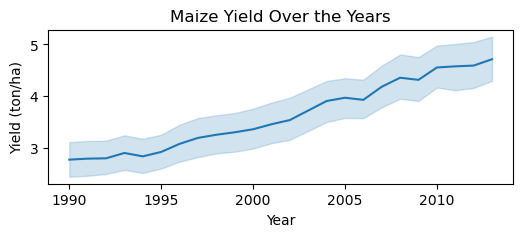

In [48]:
# Plot yield over the years
plt.figure(figsize=(6, 2))
sns.lineplot(x='Year', y='ton/ha_yield', data=maize_data)
plt.title('Maize Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Yield (ton/ha)')
plt.show()

In [ ]:
# Looking at this graph it seems that over the years the yield of Maize has been increasing.

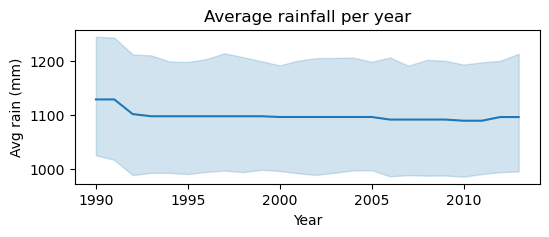

In [8]:
# Plot rain over the years
plt.figure(figsize=(6, 2))
sns.lineplot(x='Year', y='average_rain_fall_mm_per_year', data=maize_data)
plt.title('Average rainfall per year')
plt.xlabel('Year')
plt.ylabel('Avg rain (mm)')
plt.show()

In [ ]:
# It does not look like the average rain over the years has changed much at all. So this feature could not be good for determine the maize yield in the model.

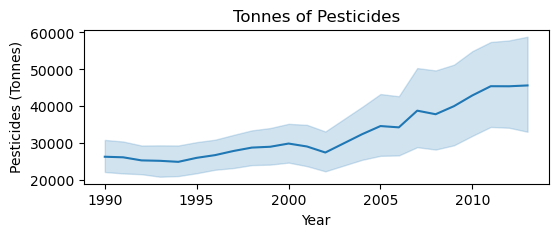

In [9]:
# Plot pesticides over the years
plt.figure(figsize=(6, 2))
sns.lineplot(x='Year', y='pesticides_tonnes', data=maize_data)
plt.title('Tonnes of Pesticides')
plt.xlabel('Year')
plt.ylabel('Pesticides (Tonnes)')
plt.show()

In [ ]:
# The amount of pesticides used has raised and show a similar tendency of the yield of maize through the years.

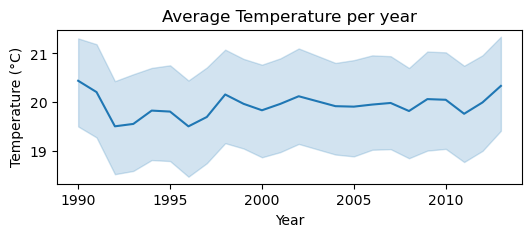

In [12]:
# Plot temperature over the years
plt.figure(figsize=(6, 2))
sns.lineplot(x='Year', y='avg_temp', data=maize_data)
plt.title('Average Temperature per year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
# Temperature does not show much variance a long the years. It is not as constant as the rain. It does not match with the behaviour of the crop through the years.

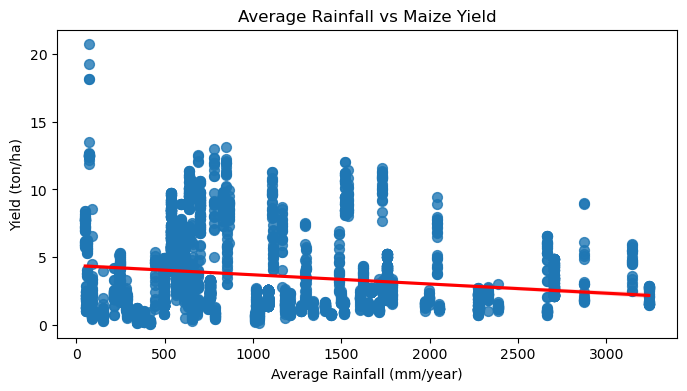

In [49]:
# Plot average rainfall vs yield with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='average_rain_fall_mm_per_year', y='ton/ha_yield', data=maize_data, scatter_kws={'s': 50}, line_kws={"color":"red"})
plt.title('Average Rainfall vs Maize Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (ton/ha)')
plt.show()

In [ ]:
# The line is just for visual purposes to see the kind of correlation tendency between target and feature. Here it seems rains affects negatively the amount of maize produced.

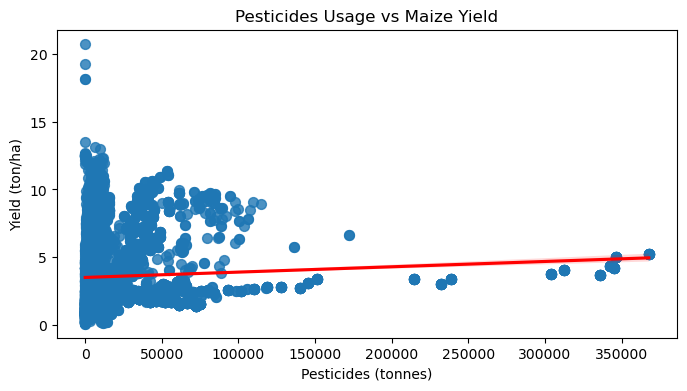

In [50]:
# Plot pesticides usage vs yield with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='pesticides_tonnes', y='ton/ha_yield', data=maize_data, scatter_kws={'s': 50}, line_kws={"color":"red"})
plt.title('Pesticides Usage vs Maize Yield')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (ton/ha)')
plt.show()

In [ ]:
# It seems yield and pesticides are correlated positively.

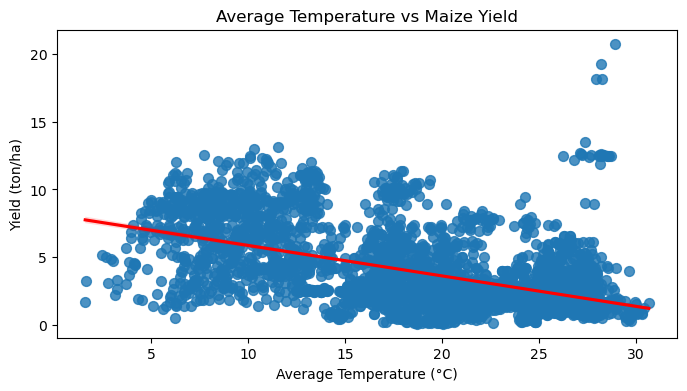

In [51]:
# Plot average temperature vs yield with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='avg_temp', y='ton/ha_yield', data=maize_data, scatter_kws={'s': 50}, line_kws={"color":"red"})
plt.title('Average Temperature vs Maize Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (ton/ha)')
plt.show()

In [ ]:
# In this plot it could be seen that rains affects negatively the amount of maize produced.

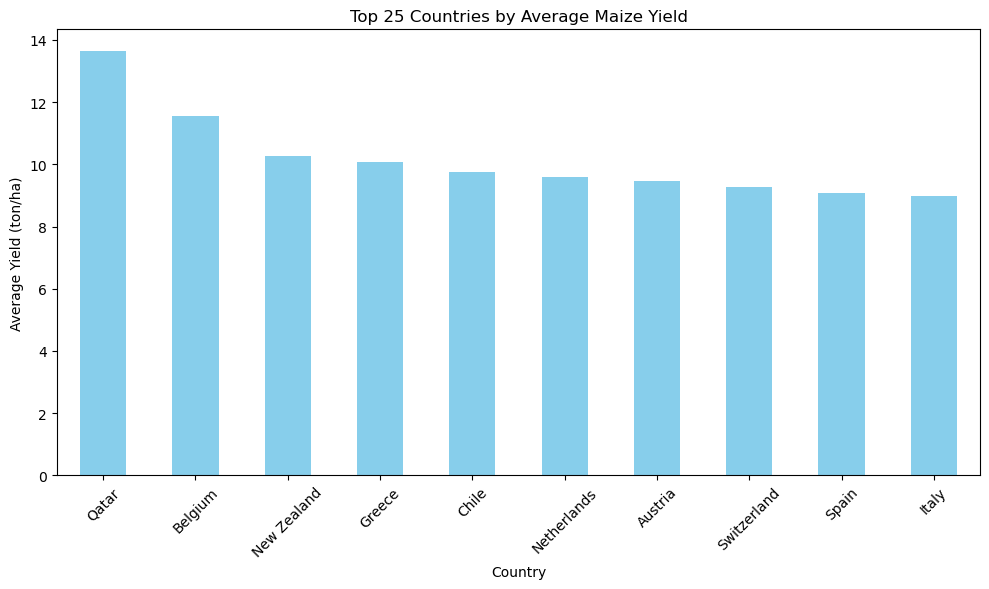

In [85]:
# Calculate the average yield per area/country
average_yield_per_area = maize_data.groupby('Area')['ton/ha_yield'].mean().sort_values(ascending=False)

# Get the top 25 countries with the highest average maize yield
top_25_countries = average_yield_per_area.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_25_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Maize Yield')
plt.xlabel('Country')
plt.ylabel('Average Yield (ton/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# This plot is just for information purposes to see which are the 25 top producers of maize in the world. In the top five are Qatar, Belgium, New Zealand, Greece and Chile.

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


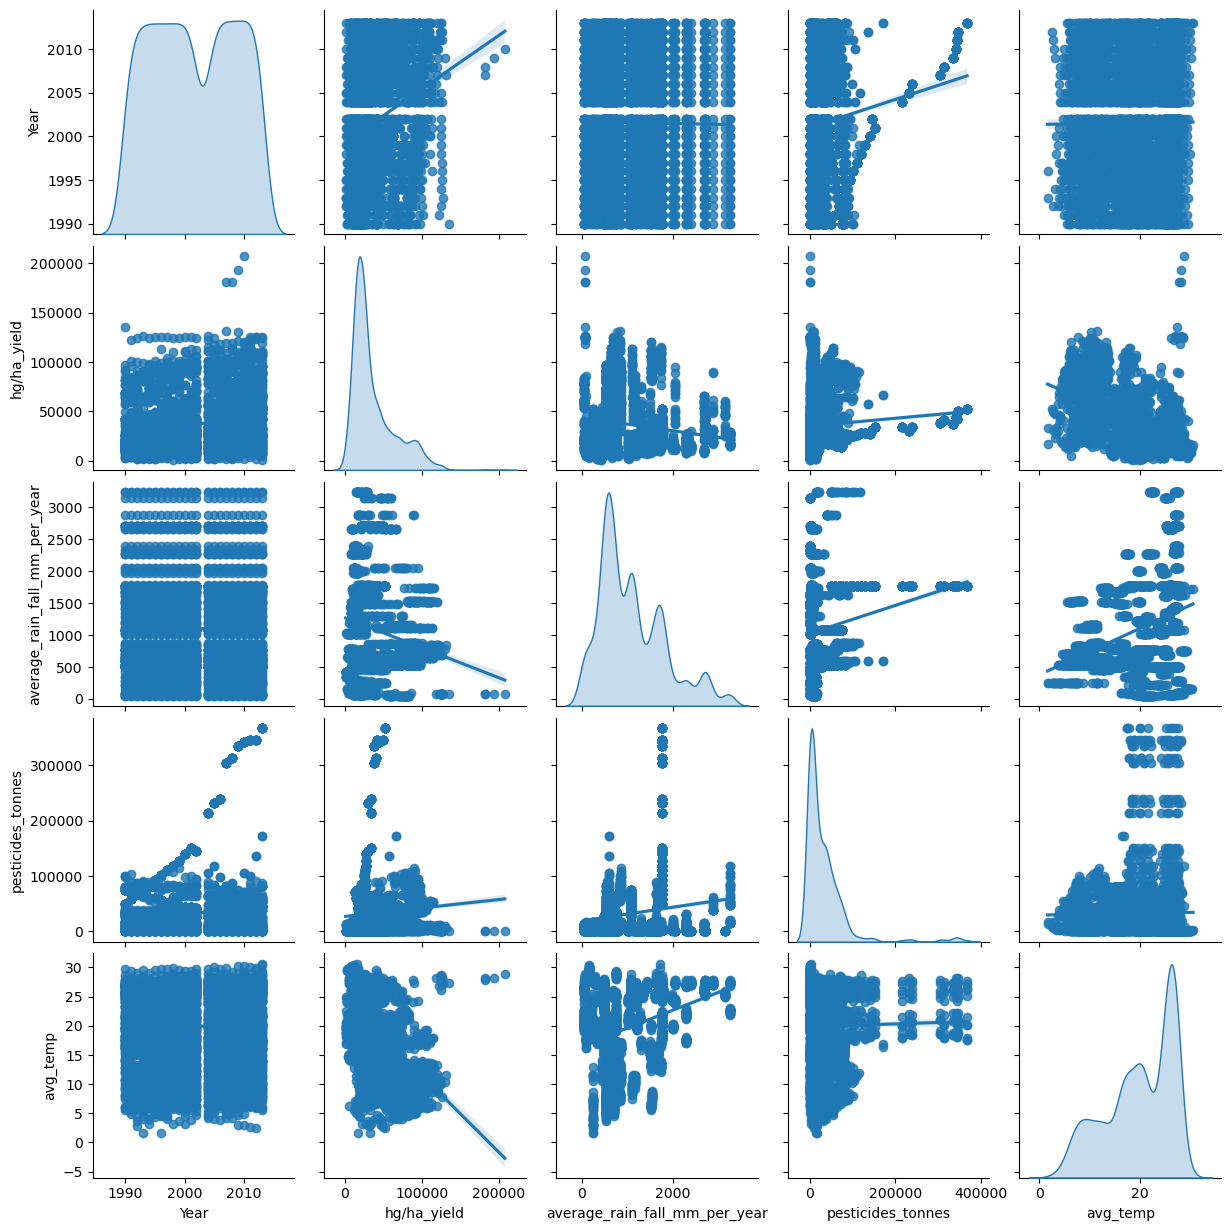

In [37]:
# Visualize distributions
sns.pairplot(maize_data, kind='reg', diag_kind='kde')
plt.show()

In [14]:
# Calculate the correlation matrix
correlation_matrix = maize_data # Relevant features for correlation analysis
selected_features = ['Year', 'ton/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Calculate the correlation matrix
correlation_matrix = maize_data[selected_features].corr().corr()

correlation_matrix

,Year,ton/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.335541,-0.517069,-0.164906,-0.355749
ton/ha_yield,0.335541,1.000000,-0.653717,-0.020869,-0.957255
average_rain_fall_mm_per_year,-0.517069,-0.653717,1.000000,-0.058370,0.538512
pesticides_tonnes,-0.164906,-0.020869,-0.058370,1.000000,-0.188266
avg_temp,-0.355749,-0.957255,0.538512,-0.188266,1.000000


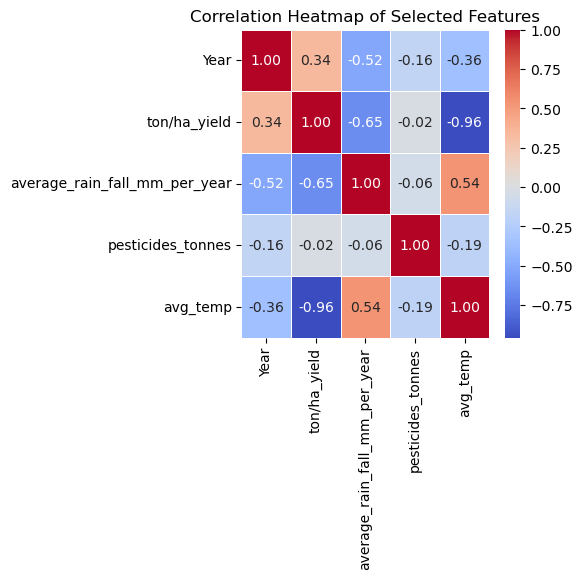

In [19]:
# Plot the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Here we can see the correlations between the features and the target. Avg temperature and average rain fall with -0.96 and -0.65 respectively are highly related with yield of maize, but tons of pesticides are not. So for our selection of features in the model, just those two correlated features will be used in the model. I did not remove the possible outliers in the features as that data could provide some information of the yield of maize in severe conditions.

# Step 6: Modelling

Select the features and target.

In [55]:
# Select features and target
X = maize_data[['average_rain_fall_mm_per_year', 'avg_temp']]
y = maize_data['ton/ha_yield']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Define, Fit, Verify and Evaluate the Training Model 

Choose three regression models:

Linear Regression

Decision Tree Regression

Random Forest Regression

We'll train these models and evaluate their performance.

In [57]:
# Initialize Linear Regression
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_lr = lr.predict(X_train)

In [58]:
# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_dt = dt.predict(X_train)

In [59]:
#Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_rf = rf.predict(X_train)

In [60]:
# Evaluate models using appropriate metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred) # 
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

In [61]:
# Training performance in the tree models
mse_train_lr, rmse_train_lr, mae_train_lr, r2_train_lr = evaluate_model(y_train, y_pred_train_lr)
mse_train_dt, rmse_train_dt, mae_train_dt, r2_train_dt = evaluate_model(y_train, y_pred_train_dt)
mse_train_rf, rmse_train_rf, mae_train_rf, r2_train_rf = evaluate_model(y_train, y_pred_train_rf)

In [62]:
# Print evaluation metrics
print("Linear Regression Training Performance:")
print(f"MSE: {mse_train_lr}, RMSE: {rmse_train_lr}, MAE: {mae_train_lr}, R2: {r2_train_lr}\n")

print("Decision Tree Regression Training Performance:")
print(f"MSE: {mse_train_dt}, RMSE: {rmse_train_dt}, MAE: {mae_train_dt}, R2: {r2_train_dt}\n")

print("Random Forest Regression Training Performance:")
print(f"MSE: {mse_train_rf}, RMSE: {rmse_train_rf}, MAE: {mae_train_rf}, R2: {r2_train_rf}")

Linear Regression Training Performance:
MSE: 5.376135278602513, RMSE: 2.318649451426954, MAE: 1.6797354456058302, R2: 0.29108667469766125

Decision Tree Regression Training Performance:
MSE: 0.05509597862706599, RMSE: 0.2347253259174774, MAE: 0.07041764216366159, R2: 0.9927348789799328

Random Forest Regression Training Performance:
MSE: 0.2172742957787696, RMSE: 0.4661269095201109, MAE: 0.29432828632218394, R2: 0.9713495595737148


In [64]:
# Try Polynomial regression as Lineal Regression wasn't performing well and the polynomial would capture non-linear correlations.
# Create polynomial features for a polynomial regression
degree = 3  # Try degree 2, 4 but the best results were got with degree 3, but still not as good as RandomForestRegressor
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree {degree}) Performance:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Polynomial Regression (Degree 3) Performance:
RMSE: 2.047994913086361
MAE: 1.4913823214678772
R²: 0.42879799718142786


In [ ]:
# Even the results are much better than just linear regression, it does not good enough over DecisionTreeRegressor or RandomForestRegressor.

# Step 9: Make Predictions and Evaluate the Test Model

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [65]:
# Make predictions
y_pred_test_lr = lr.predict(X_test)
y_pred_test_dt = dt.predict(X_test)
y_pred_test_rf = rf.predict(X_test)

In [66]:
# Testing performance
mse_test_lr, rmse_test_lr, mae_test_lr, r2_test_lr = evaluate_model(y_test, y_pred_test_lr)
mse_test_dt, rmse_test_dt, mae_test_dt, r2_test_dt = evaluate_model(y_test, y_pred_test_dt)
mse_test_rf, rmse_test_rf, mae_test_rf, r2_test_rf = evaluate_model(y_test, y_pred_test_rf)

In [67]:
# Print evaluation metrics
print("Linear Regression Testing Performance:")
print(f"MSE: {mse_test_lr}, RMSE: {rmse_test_lr}, MAE: {mae_test_lr}, R2: {r2_test_lr}\n")

print("Decision Tree Regression Testing Performance:")
print(f"MSE: {mse_test_dt}, RMSE: {rmse_test_dt}, MAE: {mae_test_dt}, R2: {r2_test_dt}\n")

print("Random Forest Regression Testing Performance:")
print(f"MSE: {mse_test_rf}, RMSE: {rmse_test_rf}, MAE: {mae_test_rf}, R2: {r2_test_rf}")

Linear Regression Testing Performance:
MSE: 4.975654807957716, RMSE: 2.2306175844276215, MAE: 1.6606185466817265, R2: 0.3223862384841606

Decision Tree Regression Testing Performance:
MSE: 1.6630339598775186, RMSE: 1.2895867399587817, MAE: 0.8197184222222222, R2: 0.7735183125487504

Random Forest Regression Testing Performance:
MSE: 1.2596764868411316, RMSE: 1.1223531025667153, MAE: 0.7631000697791298, R2: 0.8284498914240734


In [ ]:
# Key takeaways in the metrics results in both training and testing sets.

- Linear Regression has the highest values for MSE, RMSE and MAE, R2 is very low. So this model it is not the best to predict the maize yield.

- Decision Tree Regression has much better values for the metrics in the training set (low values) but in the test set not much, so this indicates an overfitting problem.

- Random Forest Regression is the best model of the three as the metrics are low in both training and test sets plus R2 is high that means that the variance in the dependent variable is predictable from the independent variables in a 91% in the training set and 82% in the test set.
  This model has less tendency to overfitting.
    
In conclusion the best model to predict the yield of maize using temperature and rain as a predictors is Random Forest. If we see the RMSE numbers are the low in both sets and R2 are the highest.
RMSE is much better metric in term of regression models as it provides a good understanding of the performance of the model, where low values show a better predictive accuracy. Also it has the same
units of the target variable which help to interpret and compare the values. And R2 measures the goodness of fit of the model to the observed data, indicating how well the model's predictions match 
the actual data points.


# Step 10:  Hyperparameter Tuning For the Best Model Random Forest

In [68]:
# After trying different regressors, Random Forest was the best so try to improve it with hyperparameter tuning.
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [70]:
# Fit Grid Search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [71]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [72]:
# Evaluate the model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [73]:
# Evaluate best model
mse_best_rf, rmse_best_rf, mae_best_rf, r2_best_rf = evaluate_model(y_test, y_pred_best_rf)
print(f"Best Random Forest Testing Performance - MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, MAE: {mae_best_rf}, R2: {r2_best_rf}")

Best Random Forest Testing Performance - MSE: 1.0898196758969505, RMSE: 1.0439442877361562, MAE: 0.7479141515725846, R2: 0.8515819849927215


In [ ]:
# Using this tool to tune the hyperparameter helps to improve the model in at least 0.2 units in each of the metrics for the model.

# Step 11:  Plotting Actual vs Predicted Maize Yield

In [76]:
# Create DataFrame for actual and predicted values
comparison_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best_rf
})

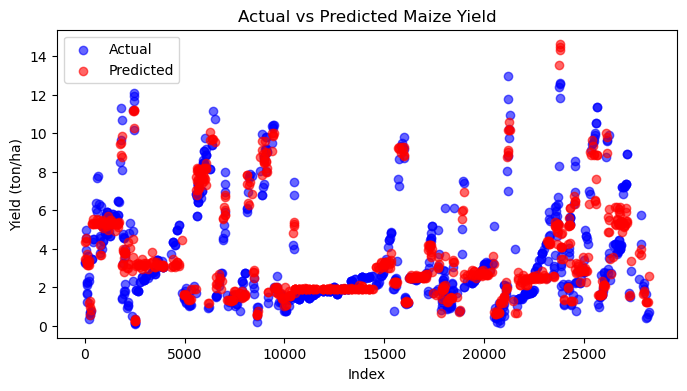

In [80]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 4))
plt.scatter(comparison_data.index, comparison_data['Actual'], color='blue', alpha=0.6, label='Actual')
plt.scatter(comparison_data.index, comparison_data['Predicted'], color='red', alpha=0.6, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Yield (ton/ha)')
plt.title('Actual vs Predicted Maize Yield')
plt.legend()
plt.show()

In [ ]:
# In a perfect model blue and red dots will overlap but here we can see that not all of them do it. That is why the model just explain the variance in a 85% with the best hyperparameters fitted in the Random Forest Regressor. 
That means that there is still room for improvement in the model.

# Step 11: Future work

The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
# In this model just environmental features (rain and temperature) were use, unfortunately pesticides does not help much in the prediction of maize yield.

- To improve the model some new features could be consider like use of fertilizer, soil quality, crop rotation, treatment of pest and diseases.

- Make sure that the possible outliers are related to severe weather conditions production, otherwise removing them would probably bring some improvement in the model.

- Also information about the way the top producers grow their maize would be useful for model prediction of yield of maize for better performance.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



